# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
!pip install citipy

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from api_keys import weather_api_key  
from citipy import citipy 

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the city names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        city_weather = response.json()

        # Check if the response was successful
        if response.status_code == 200:
            # Parse out relevant data
            city_lat = city_weather['coord']['lat']
            city_lng = city_weather['coord']['lon']
            city_max_temp = city_weather['main']['temp_max']
            city_humidity = city_weather['main']['humidity']
            city_clouds = city_weather['clouds']['all']
            city_wind = city_weather['wind']['speed']
            city_country = city_weather['sys']['country']
            city_date = city_weather['dt']  # Can be formatted if needed

            # Append the City information into city_data list
            city_data.append({
                "City": city,
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            })
        else:
            print(f"Error fetching data for {city}: {city_weather.get('message', 'No message')}")
            print("City not found. Skipping...")
            continue

    except Exception as e:
        print(f"An error occurred: {e}")
        print("City not found. Skipping...")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Number of cities in the list: 612
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | kabalo
Processing Record 4 of Set 1 | sechura
Processing Record 5 of Set 1 | keflavik
Processing Record 6 of Set 1 | afaahiti
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | barcelos
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | tynda
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | alofi
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | aykhal
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | ust-nera
Processing Record 18 of Set 1 | ytyk-kyuyel'
Error fetching data for ytyk-kyuyel': city not found
City not found. Skipping...
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | taoudenni
P

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

---

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,-12.63,93,93,2.77,RU,1730420838
1,adamstown,-25.0660,-130.1015,21.13,82,100,11.91,PN,1730420839
2,kabalo,-6.0500,26.9167,21.26,97,98,0.91,CD,1730420840
3,sechura,-5.5569,-80.8222,18.77,73,60,6.98,PE,1730420841
4,keflavik,64.0049,-22.5624,1.24,51,0,6.69,IS,1730420842


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-12.63,93,93,2.77,RU,1730420838
1,adamstown,-25.0660,-130.1015,21.13,82,100,11.91,PN,1730420839
2,kabalo,-6.0500,26.9167,21.26,97,98,0.91,CD,1730420840
3,sechura,-5.5569,-80.8222,18.77,73,60,6.98,PE,1730420841
4,keflavik,64.0049,-22.5624,1.24,51,0,6.69,IS,1730420842


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

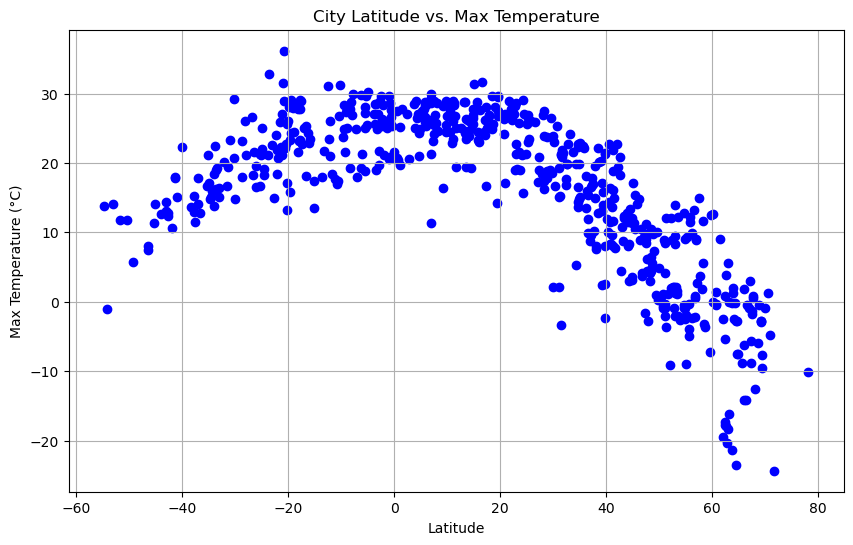

In [22]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='blue')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

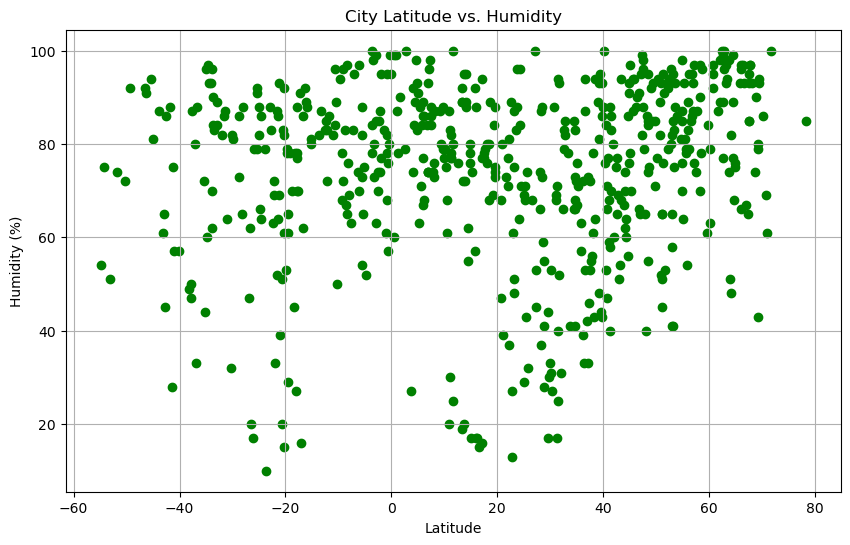

In [24]:
# Build the scatter plot for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='green')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

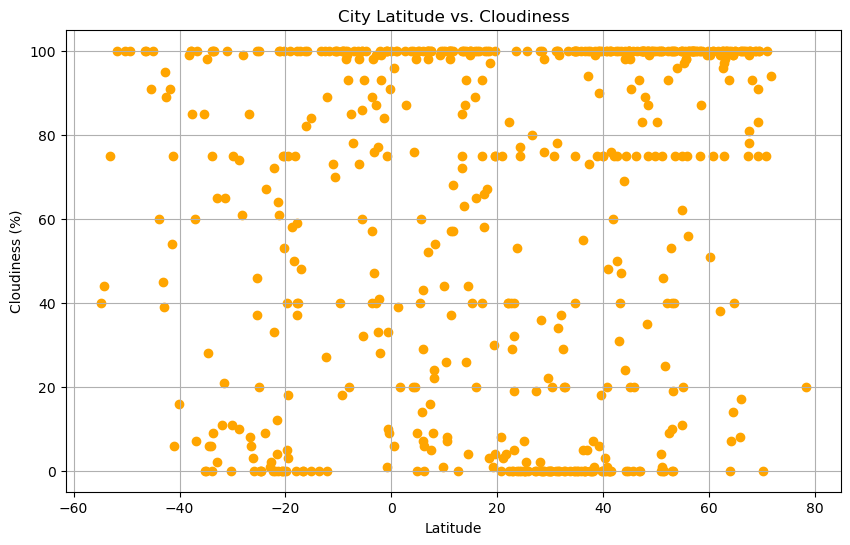

In [26]:
# Build the scatter plot for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='orange')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

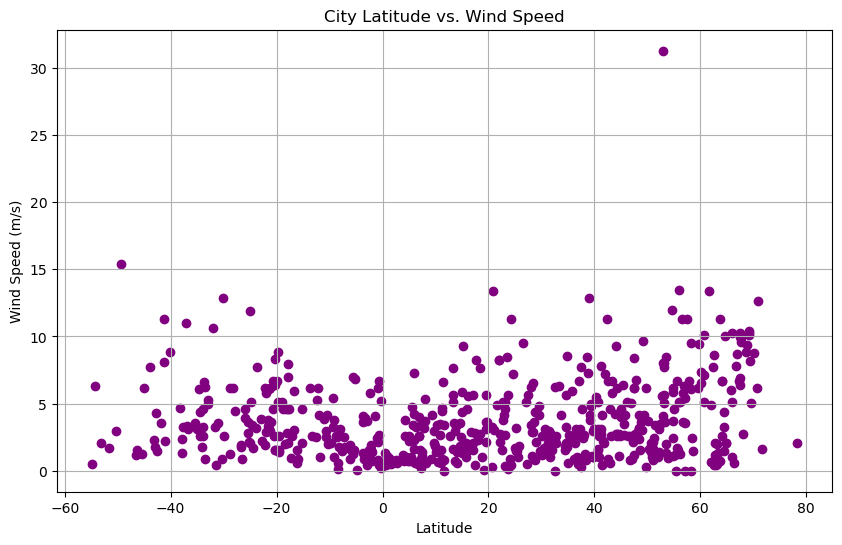

In [28]:
# Build the scatter plot for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='purple')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, x_label, y_label, title, output_file):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Calculate regression line values
    regression_line = slope * x + intercept
    
    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', alpha=0.5, edgecolors='w', s=100)
    
    # Plot the regression line
    plt.plot(x, regression_line, color='red', linewidth=2)
    
    # Incorporate graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    
    # Save the figure
    plt.savefig(output_file)
    plt.show()

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-12.63,93,93,2.77,RU,1730420838
4,keflavik,64.0049,-22.5624,1.24,51,0,6.69,IS,1730420842
7,barcelos,41.5388,-8.6151,14.97,83,76,2.20,PT,1730420845
9,tynda,55.1667,124.7167,-9.00,93,97,1.18,RU,1730420848
13,olonkinbyen,70.9221,-8.7187,-4.84,61,100,12.66,SJ,1730420852


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,21.13,82,100,11.91,PN,1730420839
2,kabalo,-6.0500,26.9167,21.26,97,98,0.91,CD,1730420840
3,sechura,-5.5569,-80.8222,18.77,73,60,6.98,PE,1730420841
5,afaahiti,-17.7500,-149.2833,23.31,77,59,7.00,PF,1730420843
6,west island,-12.1568,96.8225,25.99,83,89,6.17,CC,1730420844


###  Temperature vs. Latitude Linear Regression Plot

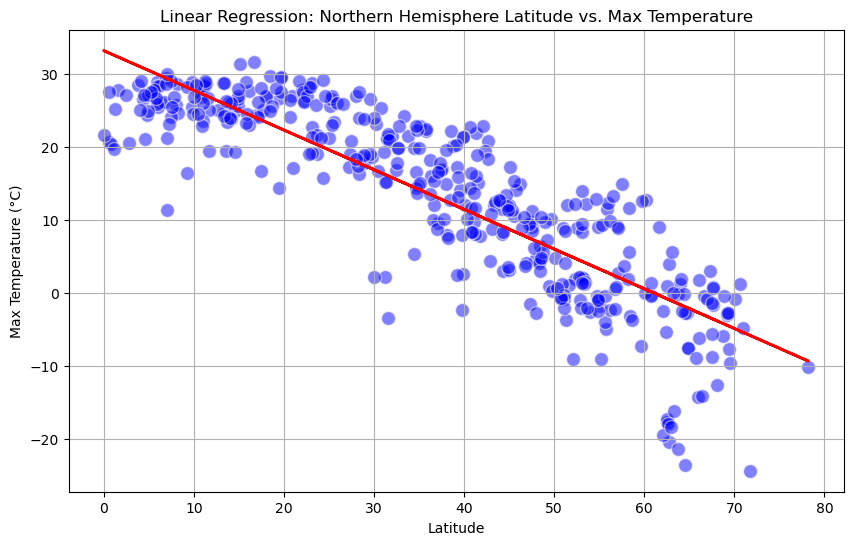

In [36]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Max Temp'],
    'Latitude',
    'Max Temperature (°C)',
    'Linear Regression: Northern Hemisphere Latitude vs. Max Temperature',
    'output_data/LinearReg_NorthernHemisphere_MaxTemp.png'
)

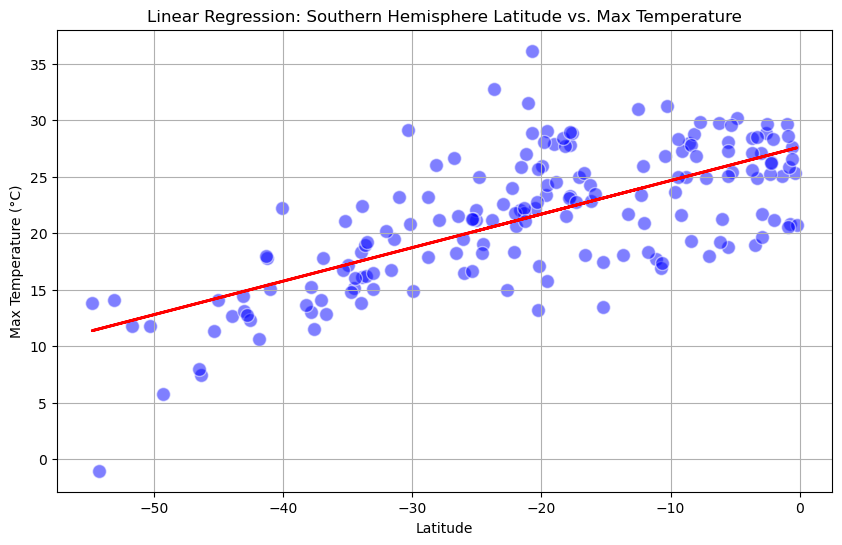

In [38]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Max Temp'],
    'Latitude',
    'Max Temperature (°C)',
    'Linear Regression: Southern Hemisphere Latitude vs. Max Temperature',
    'output_data/LinearReg_SouthernHemisphere_MaxTemp.png'
)

**Discussion about the linear relationship:** The analysis shows that maximum temperature tends to decrease as latitude increases in both the Northern and Southern Hemispheres. This means areas near the equator are warmer, while polar regions are colder. While latitude is a key factor, other things like altitude and distance from oceans also affect temperature. This highlights the need to consider various factors in climate studies.

### Humidity vs. Latitude Linear Regression Plot

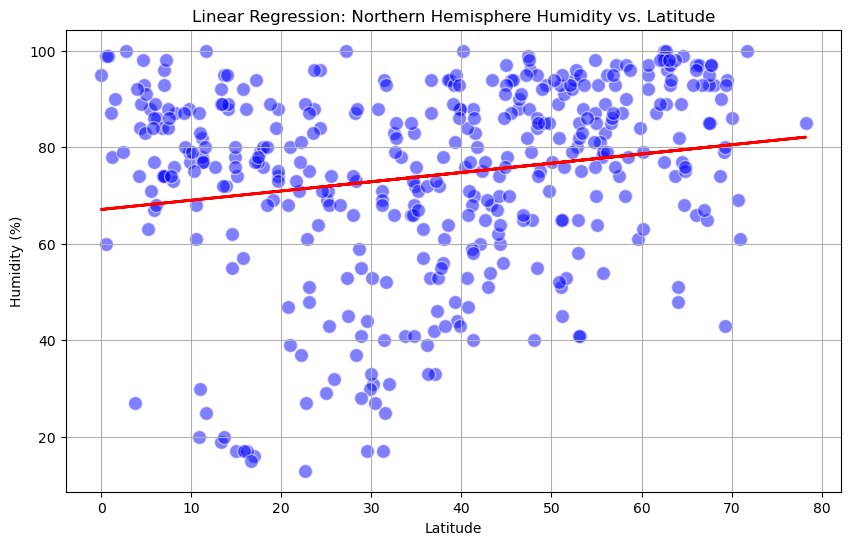

In [40]:
# Northern Hemisphere Humidity vs Latitude Linear Regression Plot
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Humidity'],
    'Latitude',
    'Humidity (%)',
    'Linear Regression: Northern Hemisphere Humidity vs. Latitude',
    'output_data/LinearReg_NorthernHemisphere_Humidity.png'
)

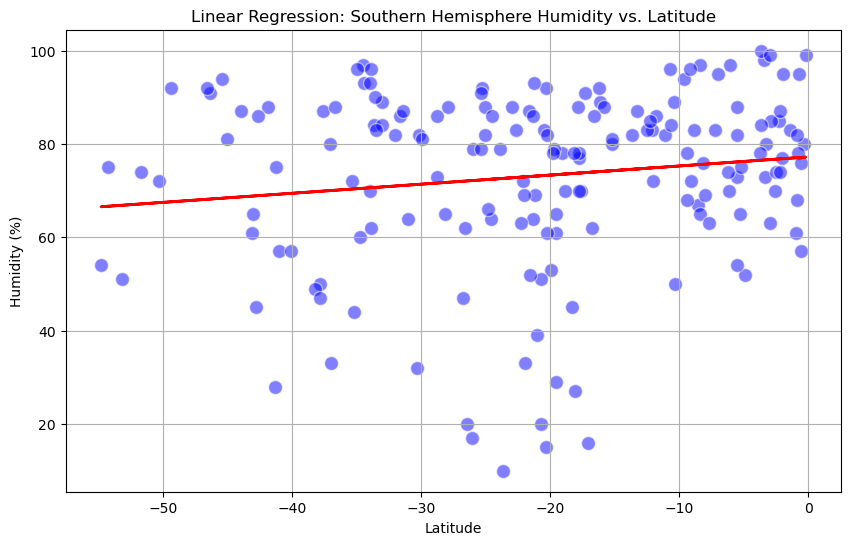

In [42]:
# Southern Hemisphere Humidity vs Latitude Linear Regression Plot
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Humidity'],
    'Latitude',
    'Humidity (%)',
    'Linear Regression: Southern Hemisphere Humidity vs. Latitude',
    'output_data/LinearReg_SouthernHemisphere_Humidity.png'
)

**Discussion about the linear relationship:** The analysis of humidity versus latitude shows that there isn't a strong linear relationship in either hemisphere. Humidity levels can vary widely due to factors like geographic features, climate zones, and proximity to oceans. In general, tropical regions tend to have higher humidity, while polar areas are drier. This indicates that while latitude plays a role, other environmental factors are also important in understanding humidity patterns.

### Cloudiness vs. Latitude Linear Regression Plot

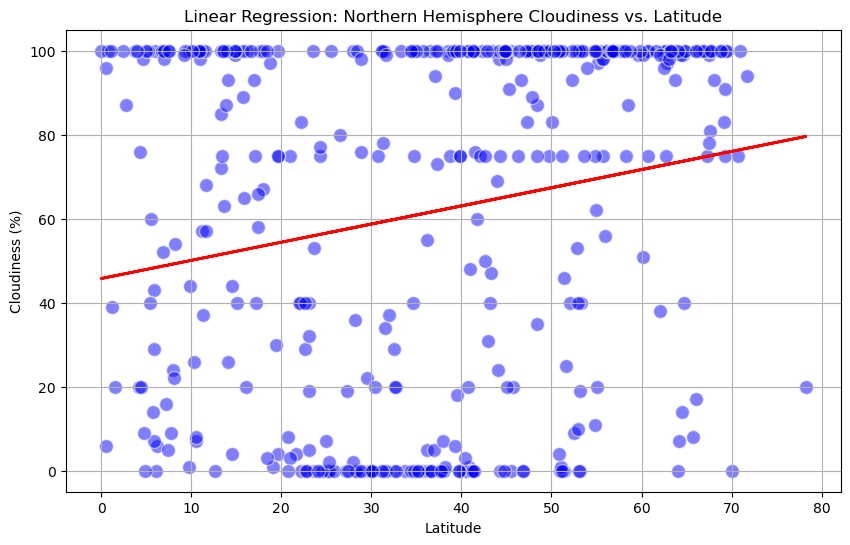

In [44]:
# Northern Hemisphere Cloudiness vs Latitude Linear Regression Plot
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Cloudiness'],
    'Latitude',
    'Cloudiness (%)',
    'Linear Regression: Northern Hemisphere Cloudiness vs. Latitude',
    'output_data/LinearReg_NorthernHemisphere_Cloudiness.png'
)

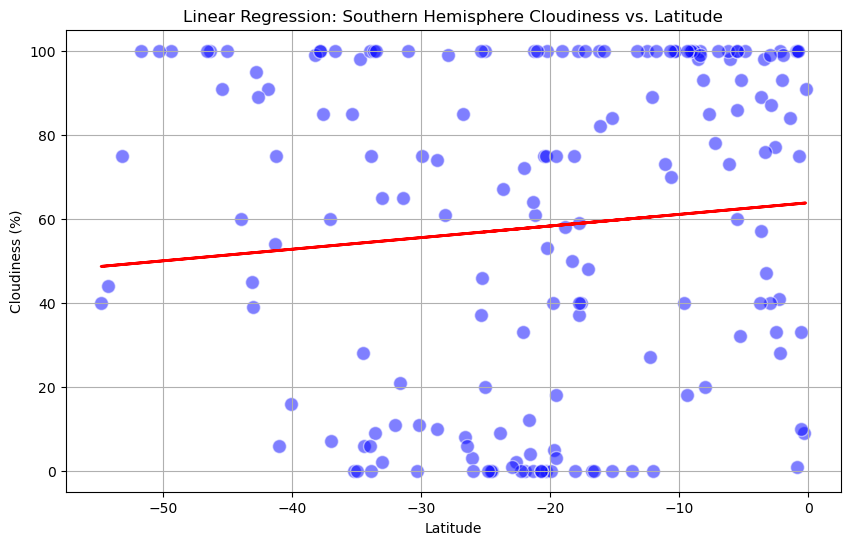

In [46]:
# Southern Hemisphere Cloudiness vs Latitude Linear Regression Plot
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Cloudiness'],
    'Latitude',
    'Cloudiness (%)',
    'Linear Regression: Southern Hemisphere Cloudiness vs. Latitude',
    'output_data/LinearReg_SouthernHemisphere_Cloudiness.png'
)

**Discussion about the linear relationship:** The analysis of cloudiness versus latitude shows no strong linear relationship in either hemisphere. Cloudiness levels can vary significantly due to local climate, geography, and seasonal changes. In the Northern Hemisphere, cloud cover may increase in mid-latitude regions, while the Southern Hemisphere is influenced by ocean currents and land distribution. Overall, latitude offers some insight, but other factors are also important in understanding cloudiness patterns.

### Wind Speed vs. Latitude Linear Regression Plot

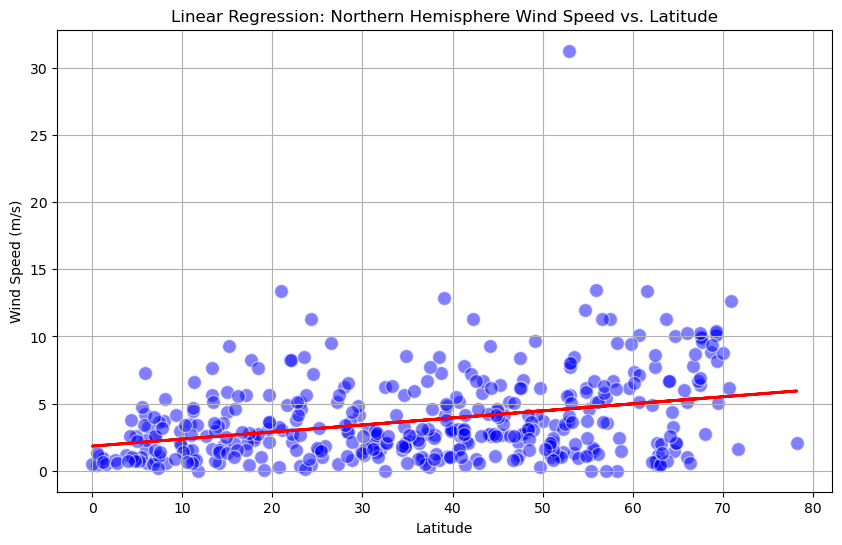

In [48]:
# Northern Hemisphere Wind Speed vs Latitude Linear Regression Plot
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Wind Speed'],
    'Latitude',
    'Wind Speed (m/s)',
    'Linear Regression: Northern Hemisphere Wind Speed vs. Latitude',
    'output_data/LinearReg_NorthernHemisphere_WindSpeed.png'
)

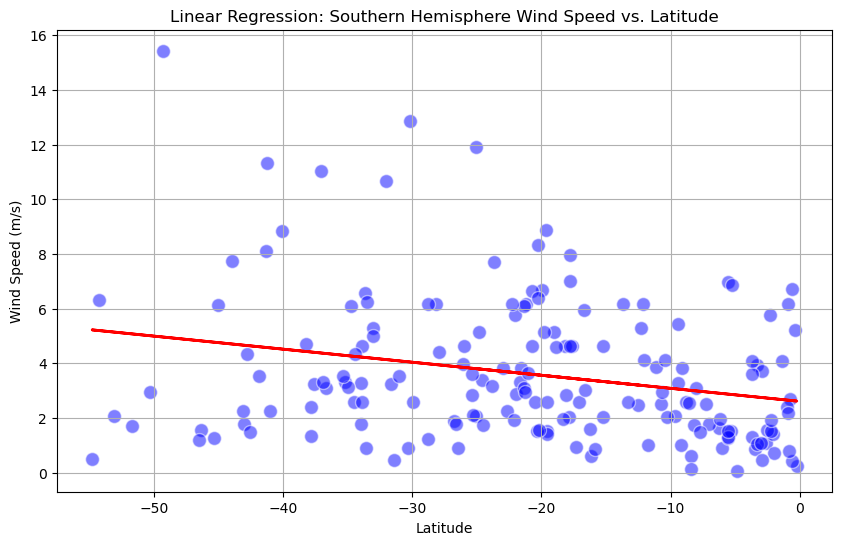

In [50]:
# Southern Hemisphere Wind Speed vs Latitude Linear Regression Plot
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Wind Speed'],
    'Latitude',
    'Wind Speed (m/s)',
    'Linear Regression: Southern Hemisphere Wind Speed vs. Latitude',
    'output_data/LinearReg_SouthernHemisphere_WindSpeed.png'
)

**Discussion about the linear relationship:** The analysis of wind speed versus latitude shows a variable relationship in both hemispheres. Wind speed is influenced by factors like atmospheric pressure, geography, and seasonal weather patterns. In the Northern Hemisphere, wind speeds may increase in certain latitudes due to the jet stream, while in the Southern Hemisphere, ocean currents play a significant role. Overall, while latitude offers some insights, other factors are crucial for understanding wind patterns.